In [52]:
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns


 
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import numpy as np
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Import all the models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [ ]:
df1=pd.read_csv("C:\\Users\\PC\\Desktop\\py project(ca2)\\a.csv")
df2=pd.read_csv("C:\\Users\\PC\\Desktop\\py project(ca2)\\b.csv")
df3=pd.read_csv("C:\\Users\\PC\\Desktop\\py project(ca2)\\c.csv")
df4=pd.read_csv("C:\\Users\\PC\\Desktop\\py project(ca2)\\d.csv")
df5=pd.read_csv("C:\\Users\\PC\\Desktop\\py project(ca2)\\e.csv")
df6=pd.read_csv("C:\\Users\\PC\\Desktop\\py project(ca2)\\f.csv")
df7=pd.read_csv("C:\\Users\\PC\\Desktop\\py project(ca2)\\g.csv")
df8=pd.read_csv("C:\\Users\\PC\\Desktop\\py project(ca2)\\h.csv")

In [54]:
dfx=pd.concat([df1,df2],ignore_index=True)

dfx.head(5)

,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST,DEST_CITY_NAME,DEST_STATE_NM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DISTANCE
0,1,5,8/1/2025 12:00:00 AM,AA,ABQ,"Albuquerque, NM",New Mexico,DFW,"Dallas/Fort Worth, TX",Texas,500,450.0,-10.0,752,729.0,-23.0,0.0,569.0
1,1,5,8/1/2025 12:00:00 AM,AA,ABQ,"Albuquerque, NM",New Mexico,DFW,"Dallas/Fort Worth, TX",Texas,600,607.0,7.0,852,858.0,6.0,0.0,569.0
2,1,5,8/1/2025 12:00:00 AM,AA,ABQ,"Albuquerque, NM",New Mexico,DFW,"Dallas/Fort Worth, TX",Texas,820,1012.0,112.0,1111,1259.0,108.0,0.0,569.0
3,1,5,8/1/2025 12:00:00 AM,AA,ABQ,"Albuquerque, NM",New Mexico,DFW,"Dallas/Fort Worth, TX",Texas,1039,1041.0,2.0,1328,1334.0,6.0,0.0,569.0
4,1,5,8/1/2025 12:00:00 AM,AA,ABQ,"Albuquerque, NM",New Mexico,DFW,"Dallas/Fort Worth, TX",Texas,1705,1825.0,80.0,2000,2112.0,72.0,0.0,569.0


In [55]:
# print(dfx.head)
print(dfx.columns)

Index(['DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE', 'OP_UNIQUE_CARRIER', 'ORIGIN',
       'ORIGIN_CITY_NAME', 'ORIGIN_STATE_NM', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_NM', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY',
       'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'CANCELLED', 'DISTANCE'],
      dtype='object')


In [56]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1233806 entries, 0 to 1233805
Data columns (total 18 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   DAY_OF_MONTH       1233806 non-null  int64  
 1   DAY_OF_WEEK        1233806 non-null  int64  
 2   FL_DATE            1233806 non-null  object 
 3   OP_UNIQUE_CARRIER  1233806 non-null  object 
 4   ORIGIN             1233806 non-null  object 
 5   ORIGIN_CITY_NAME   1233806 non-null  object 
 6   ORIGIN_STATE_NM    1233806 non-null  object 
 7   DEST               1233806 non-null  object 
 8   DEST_CITY_NAME     1233806 non-null  object 
 9   DEST_STATE_NM      1233806 non-null  object 
 10  CRS_DEP_TIME       1233806 non-null  int64  
 11  DEP_TIME           1213227 non-null  float64
 12  DEP_DELAY          1213110 non-null  float64
 13  CRS_ARR_TIME       1233806 non-null  int64  
 14  ARR_TIME           1211546 non-null  float64
 15  ARR_DELAY          1206544 non-n

In [57]:
df=dfx.copy()

In [58]:
df.dropna(inplace=True)
df.drop(columns=['CANCELLED'],inplace=True)
df.shape

(1206544, 17)

In [59]:
# df=df[df['DEP_DELAY']<=500]
print(df['DAY_OF_WEEK'].unique())
df.describe()

[5 6 7 1 2 3 4]


,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,DISTANCE
count,1.206544e+06,1.206544e+06,1.206544e+06,1.206544e+06,1.206544e+06,1.206544e+06,1.206544e+06,1.206544e+06,1.206544e+06
mean,1.595520e+01,4.044597e+00,1.323745e+03,1.329527e+03,1.782913e+01,1.482011e+03,1.439751e+03,1.335821e+01,8.520264e+02
std,8.905676e+00,1.987305e+00,4.959133e+02,5.220209e+02,6.483648e+01,5.241262e+02,5.646627e+02,6.678630e+01,6.112720e+02
min,1.000000e+00,1.000000e+00,4.000000e+00,1.000000e+00,-6.000000e+01,1.000000e+00,1.000000e+00,-8.300000e+01,3.100000e+01
25%,8.000000e+00,2.000000e+00,9.000000e+02,9.010000e+02,-6.000000e+00,1.054000e+03,1.026000e+03,-1.400000e+01,4.040000e+02
50%,1.600000e+01,4.000000e+00,1.315000e+03,1.320000e+03,-1.000000e+00,1.510000e+03,1.449000e+03,-4.000000e+00,6.900000e+02
75%,2.400000e+01,6.000000e+00,1.735000e+03,1.752000e+03,1.500000e+01,1.922000e+03,1.916000e+03,1.600000e+01,1.087000e+03
max,3.100000e+01,7.000000e+00,2.400000e+03,2.400000e+03,3.164000e+03,2.400000e+03,2.400000e+03,3.147000e+03,5.095000e+03


In [60]:
df['FL_DATE']=pd.to_datetime(df['FL_DATE'])
df.info()

C:\Users\PC\AppData\Local\Temp\ipykernel_3704\3577897622.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['FL_DATE']=pd.to_datetime(df['FL_DATE'])


<class 'pandas.core.frame.DataFrame'>
Index: 1206544 entries, 0 to 1233804
Data columns (total 17 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   DAY_OF_MONTH       1206544 non-null  int64         
 1   DAY_OF_WEEK        1206544 non-null  int64         
 2   FL_DATE            1206544 non-null  datetime64[ns]
 3   OP_UNIQUE_CARRIER  1206544 non-null  object        
 4   ORIGIN             1206544 non-null  object        
 5   ORIGIN_CITY_NAME   1206544 non-null  object        
 6   ORIGIN_STATE_NM    1206544 non-null  object        
 7   DEST               1206544 non-null  object        
 8   DEST_CITY_NAME     1206544 non-null  object        
 9   DEST_STATE_NM      1206544 non-null  object        
 10  CRS_DEP_TIME       1206544 non-null  int64         
 11  DEP_TIME           1206544 non-null  float64       
 12  DEP_DELAY          1206544 non-null  float64       
 13  CRS_ARR_TIME       1206544 non-n

In [61]:
print(df['ORIGIN_STATE_NM'].unique())
print(df['DEST_STATE_NM'].unique())

['New Mexico' 'New York' 'Texas' 'Alaska' 'Georgia' 'North Carolina'
 'Connecticut' 'California' 'Maine' 'Alabama' 'Tennessee' 'Idaho'
 'Massachusetts' 'Vermont' 'Maryland' 'Montana' 'South Carolina' 'Iowa'
 'Ohio' 'Colorado' 'Kentucky' 'Virginia' 'Michigan' 'Oregon' 'New Jersey'
 'Florida' 'South Dakota' 'Washington' 'Hawaii' 'Kansas' 'Indiana'
 'Wyoming' 'Nevada' 'Arkansas' 'Missouri' 'Pennsylvania' 'Wisconsin'
 'Minnesota' 'Louisiana' 'Oklahoma' 'Nebraska' 'Illinois' 'Arizona'
 'Rhode Island' 'Puerto Rico' 'Utah' 'U.S. Virgin Islands' 'New Hampshire'
 'North Dakota' 'Mississippi' 'West Virginia'
 'U.S. Pacific Trust Territories and Possessions']
['Texas' 'Illinois' 'Arizona' 'North Carolina' 'Virginia' 'California'
 'Florida' 'Pennsylvania' 'New York' 'Connecticut' 'Maine' 'Alabama'
 'Tennessee' 'Massachusetts' 'Maryland' 'South Carolina' 'Iowa' 'Ohio'
 'Kentucky' 'Colorado' 'Michigan' 'New Jersey' 'Indiana' 'Wyoming'
 'Nevada' 'Missouri' 'Wisconsin' 'Minnesota' 'Louisiana' 'Oklahom

In [62]:
df.columns

Index(['DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE', 'OP_UNIQUE_CARRIER', 'ORIGIN',
       'ORIGIN_CITY_NAME', 'ORIGIN_STATE_NM', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_NM', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY',
       'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'DISTANCE'],
      dtype='object')

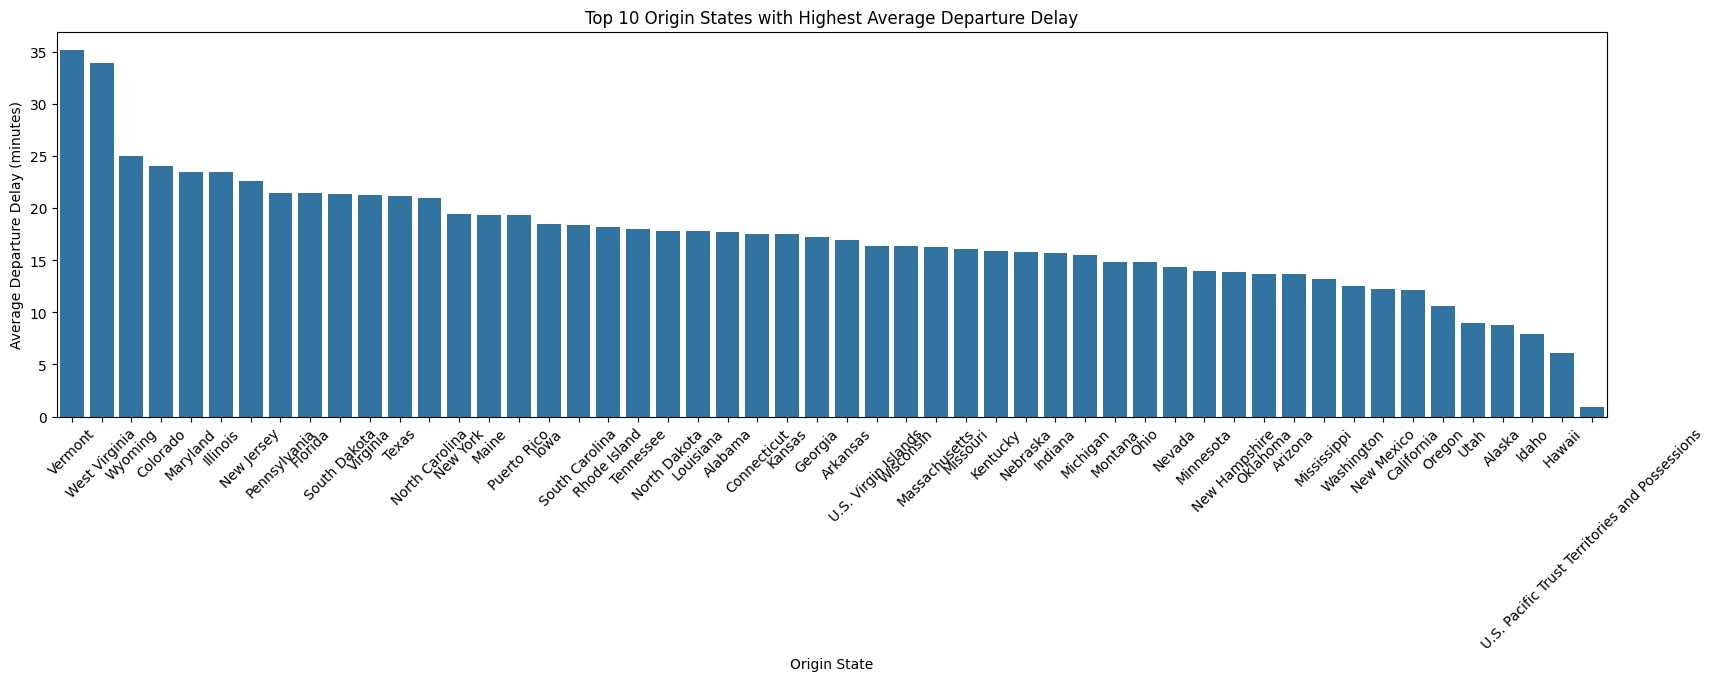

In [63]:
#barcahrt of orgin states withrespect to delay
origin_delay=df.groupby('ORIGIN_STATE_NM')['DEP_DELAY'].mean().sort_values(ascending=False)
plt.figure(figsize=(20,5))
sns.barplot(x=origin_delay.index,y=origin_delay.values)
plt.xticks(rotation=45)
plt.title("Top 10 Origin States with Highest Average Departure Delay")
plt.xlabel("Origin State")
plt.ylabel("Average Departure Delay (minutes)")
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_3704\3640358604.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_delay.index, y=day_delay.values, palette='viridis')


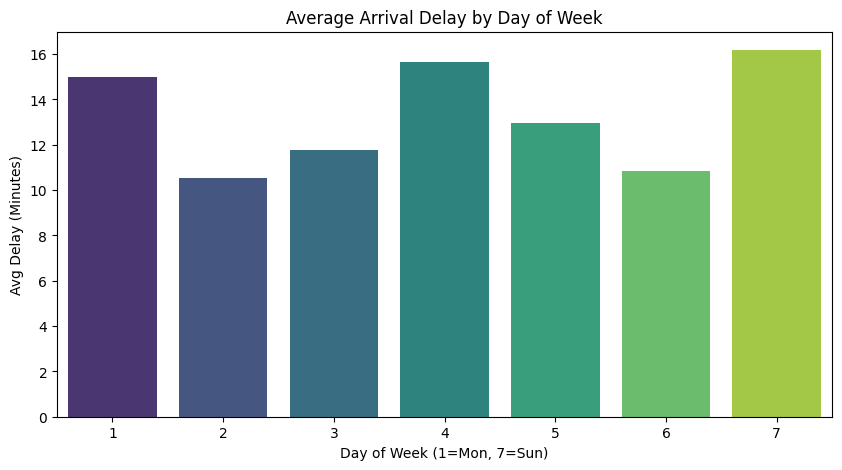

In [64]:
# --- INSIGHT 1: Average Delay by Day of Week ---
plt.figure(figsize=(10, 5))
# Group by Day of Week and take the mean of Arrival Delay
day_delay = df.groupby('DAY_OF_WEEK')['ARR_DELAY'].mean()
sns.barplot(x=day_delay.index, y=day_delay.values, palette='viridis')
plt.title('Average Arrival Delay by Day of Week')
plt.xlabel('Day of Week (1=Mon, 7=Sun)')
plt.ylabel('Avg Delay (Minutes)')
plt.show()



C:\Users\PC\AppData\Local\Temp\ipykernel_3704\3960363891.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='OP_UNIQUE_CARRIER', y='ARR_DELAY', order=order, showfliers=False, palette='Set2')


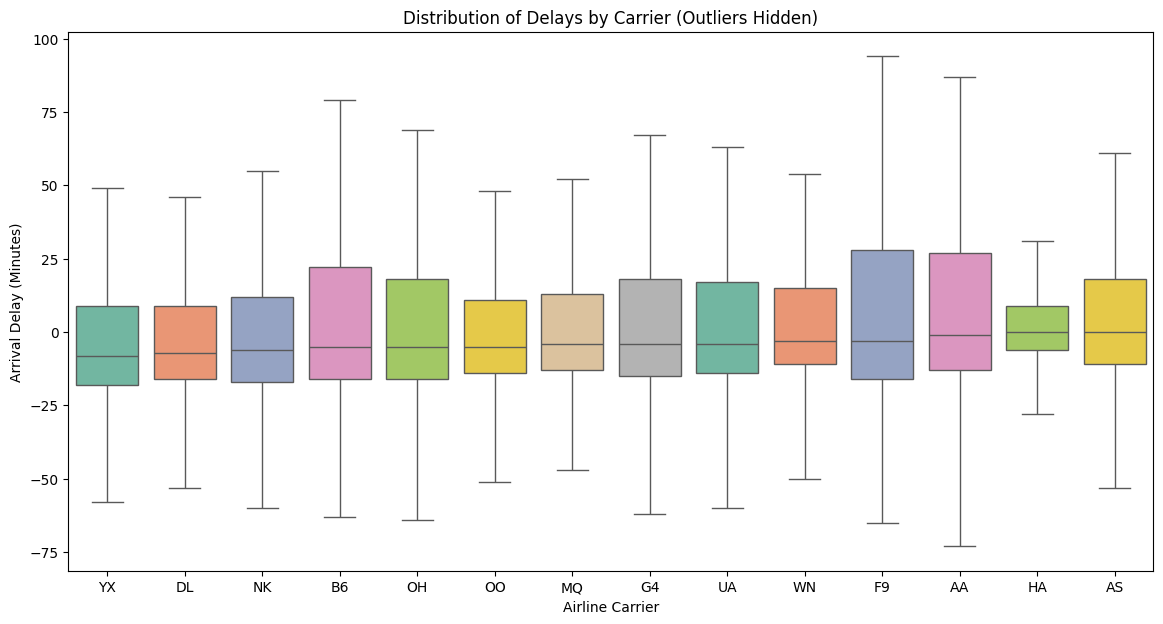

In [65]:
# --- INSIGHT 3: Carrier Reliability (Boxplot) ---
# We order them by median delay to see the best performing on the left
plt.figure(figsize=(14, 7))
order = df.groupby('OP_UNIQUE_CARRIER')['ARR_DELAY'].median().sort_values().index
sns.boxplot(data=df, x='OP_UNIQUE_CARRIER', y='ARR_DELAY', order=order, showfliers=False, palette='Set2')
plt.title('Distribution of Delays by Carrier (Outliers Hidden)')
plt.xlabel('Airline Carrier')
plt.ylabel('Arrival Delay (Minutes)')
plt.show()

# --- INSIGHT 4: Cancellation Rate by Carrier ---


C:\Users\PC\AppData\Local\Temp\ipykernel_3704\1557512076.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=worst_origins.index, y=worst_origins.values, palette='magma')


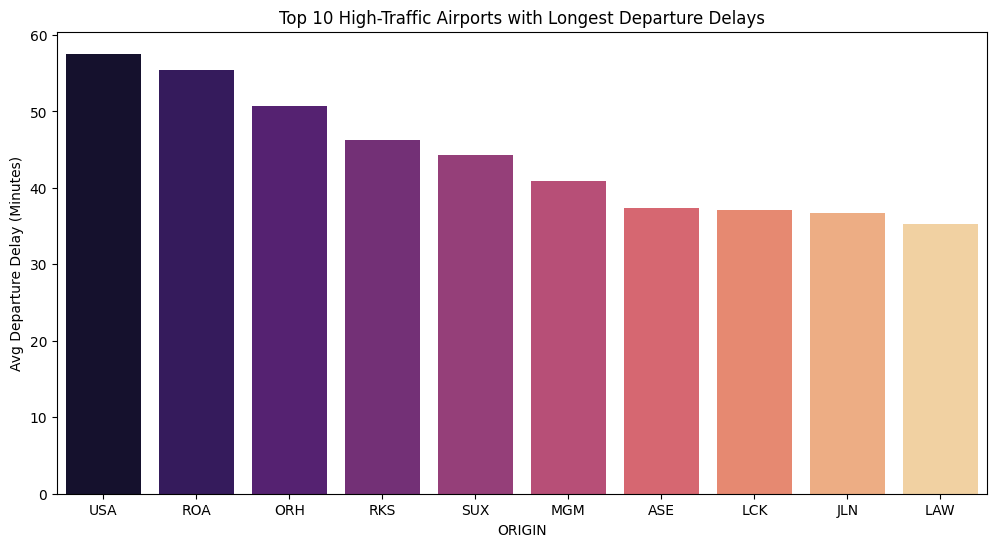

In [66]:
# --- INSIGHT 5: Top 10 Worst Origin Airports for Delays ---
# Filter for airports with significant traffic (e.g., > 100 flights in your dataset)
airport_counts = df['ORIGIN'].value_counts()
major_airports = airport_counts[airport_counts > 100].index
df_major = df[df['ORIGIN'].isin(major_airports)]

worst_origins = df_major.groupby('ORIGIN')['DEP_DELAY'].mean().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=worst_origins.index, y=worst_origins.values, palette='magma')
plt.title('Top 10 High-Traffic Airports with Longest Departure Delays')
plt.ylabel('Avg Departure Delay (Minutes)')
plt.show()

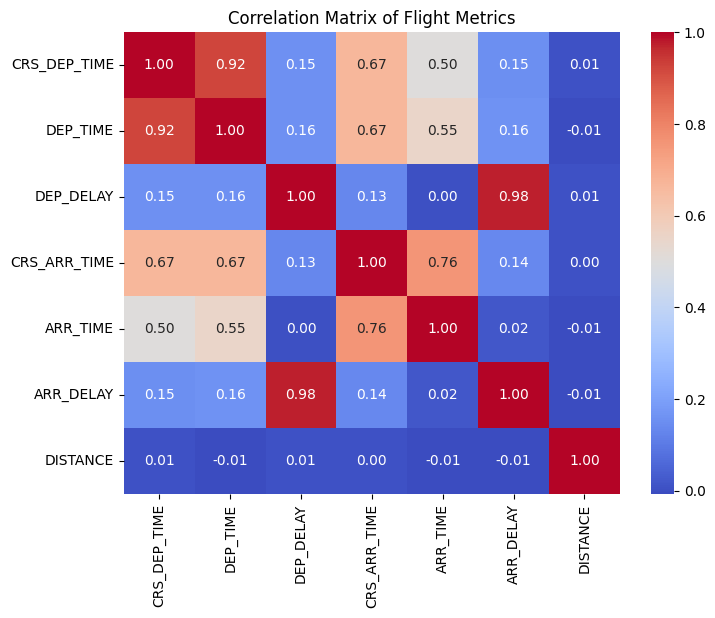

In [67]:
# --- INSIGHT 6: Correlation Heatmap ---
# We select only the numeric columns relevant to delay
cols_to_corr = ['CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY',
       'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'DISTANCE']
corr_matrix = df[cols_to_corr].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Flight Metrics')
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_3704\2097548414.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['ARR_DELAY'][df['DAY_OF_WEEK']==i] for i in range(1,8)], labels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])


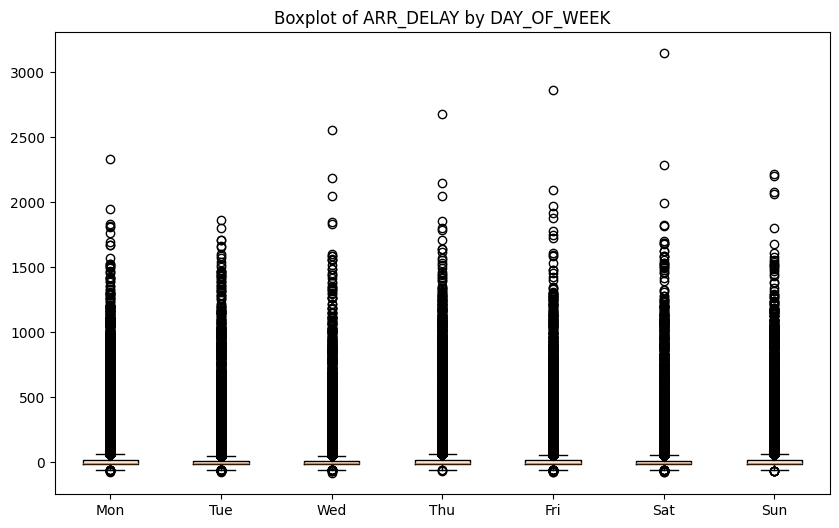

In [68]:
#eda
plt.figure(figsize=(10,6))
plt.boxplot([df['ARR_DELAY'][df['DAY_OF_WEEK']==i] for i in range(1,8)], labels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.title('Boxplot of ARR_DELAY by DAY_OF_WEEK')
plt.show()

In [69]:
import numpy as np
import pandas as pd

def clean_time_features(df, col_name):
    # Fill NA and ensure integer
    df[col_name] = df[col_name].fillna(0).astype(int)
    
    # Extract hours and minutes from HHMM format
    hours = df[col_name] // 100
    minutes = df[col_name] % 100
    
    # Calculate minutes from midnight (0 to 1440)
    min_from_midnight = (hours * 60) + minutes
    
    # SAVE THIS COLUMN (New Change)
    df[f'{col_name}_MIN'] = min_from_midnight 
    
    # Create Sin/Cos features
    df[f'{col_name}_SIN'] = np.sin(2 * np.pi * min_from_midnight / 1440)
    df[f'{col_name}_COS'] = np.cos(2 * np.pi * min_from_midnight / 1440)
    
    return df

# Apply the function
df = clean_time_features(df, 'CRS_DEP_TIME') 
df = clean_time_features(df, 'DEP_TIME') 
df = clean_time_features(df, 'CRS_ARR_TIME') 
df = clean_time_features(df, 'ARR_TIME')

In [70]:
df.columns

Index(['DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE', 'OP_UNIQUE_CARRIER', 'ORIGIN',
       'ORIGIN_CITY_NAME', 'ORIGIN_STATE_NM', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_NM', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY',
       'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'DISTANCE', 'CRS_DEP_TIME_MIN',
       'CRS_DEP_TIME_SIN', 'CRS_DEP_TIME_COS', 'DEP_TIME_MIN', 'DEP_TIME_SIN',
       'DEP_TIME_COS', 'CRS_ARR_TIME_MIN', 'CRS_ARR_TIME_SIN',
       'CRS_ARR_TIME_COS', 'ARR_TIME_MIN', 'ARR_TIME_SIN', 'ARR_TIME_COS'],
      dtype='object')

Mean Squared Error: 14.75201101221157
Mean Absolute Error: 9.858091609707266


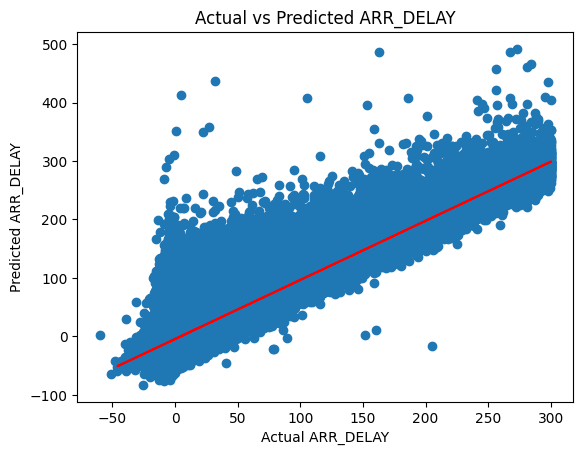

In [71]:
linearmodel=LinearRegression()
df=df[df['DEP_DELAY']<=300]
X=df[['DEP_DELAY']]
y=df['ARR_DELAY'] 

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=43)  

linearmodel.fit(x_train,y_train)
y_pred=linearmodel.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print("Mean Squared Error:",np.sqrt(mse))
print("Mean Absolute Error:",mae)

plt.scatter(X,y)
plt.plot(x_test,y_pred,color='red')
plt.xlabel("Actual ARR_DELAY")
plt.ylabel("Predicted ARR_DELAY")
plt.title("Actual vs Predicted ARR_DELAY")
plt.show()


In [72]:
linearmodel=LinearRegression()
df=df[df['DEP_DELAY']<=300]
X=df[['DEP_DELAY','DISTANCE']]
y=df['ARR_DELAY'] 

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=43)  

linearmodel.fit(x_train,y_train)
y_pred=linearmodel.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print("Mean Squared Error:",np.sqrt(mse))
print("Mean Absolute Error:",mae)

# plt.scatter(X,y)
# plt.plot(x_test,y_pred,color='red')
# plt.xlabel("Actual ARR_DELAY")
# plt.ylabel("Predicted ARR_DELAY")
# plt.title("Actual vs Predicted ARR_DELAY")
# plt.show()


Mean Squared Error: 14.72998018115618
Mean Absolute Error: 9.858813008744443


In [73]:
polynomial_features= PolynomialFeatures(degree=4)
X_poly=polynomial_features.fit_transform(X)
poly_model=LinearRegression()
poly_model.fit(X_poly,y)   
y_poly_pred=poly_model.predict(X_poly)
poly_mse=mean_squared_error(y,y_poly_pred)
poly_mae=mean_absolute_error(y,y_poly_pred)
print("Polynomial Mean Squared Error:",np.sqrt(poly_mse))
print("Polynomial Mean Absolute Error:",poly_mae)

# Visualizing the results
# plt.scatter(X,y,color='blue')
# plt.plot(X,y_poly_pred,color='red')
# plt.title('Polynomial Regression Fit')
# plt.xlabel('DEP_DELAY')
# plt.ylabel('ARR_DELAY')
# plt.show()


Polynomial Mean Squared Error: 16.43780011089065
Polynomial Mean Absolute Error: 11.283407576195614


In [74]:
df.columns

Index(['DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE', 'OP_UNIQUE_CARRIER', 'ORIGIN',
       'ORIGIN_CITY_NAME', 'ORIGIN_STATE_NM', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_NM', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY',
       'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'DISTANCE', 'CRS_DEP_TIME_MIN',
       'CRS_DEP_TIME_SIN', 'CRS_DEP_TIME_COS', 'DEP_TIME_MIN', 'DEP_TIME_SIN',
       'DEP_TIME_COS', 'CRS_ARR_TIME_MIN', 'CRS_ARR_TIME_SIN',
       'CRS_ARR_TIME_COS', 'ARR_TIME_MIN', 'ARR_TIME_SIN', 'ARR_TIME_COS'],
      dtype='object')

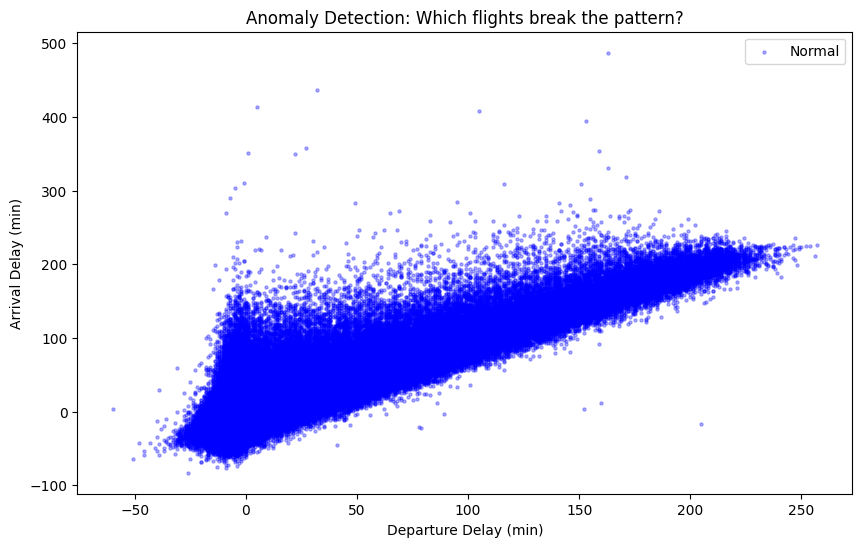

Detected 11981 anomalies.


In [75]:
features = ['CRS_DEP_TIME_COS','CRS_DEP_TIME_SIN', 'DEP_DELAY','CRS_ARR_TIME_COS','CRS_ARR_TIME_SIN','ARR_DELAY']
X_anomaly = df[features].dropna()


iso_model = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
X_anomaly['anomaly_score'] = iso_model.fit_predict(X_anomaly)


anomalies = X_anomaly[X_anomaly['anomaly_score'] == -1]


plt.figure(figsize=(10, 6))

plt.scatter(X_anomaly[X_anomaly['anomaly_score'] == 1]['DEP_DELAY'], 
            X_anomaly[X_anomaly['anomaly_score'] == 1]['ARR_DELAY'], 
            c='blue', alpha=0.3, s=5, label='Normal')


# plt.scatter(anomalies['DEP_DELAY'], anomalies['ARR_DELAY'], 
#             c='red', s=30, marker='x', label='Anomaly')

plt.title('Anomaly Detection: Which flights break the pattern?')
plt.xlabel('Departure Delay (min)')
plt.ylabel('Arrival Delay (min)')
plt.legend()
plt.show()

print(f"Detected {len(anomalies)} anomalies.")

In [ ]:
df=df[df['DEP_DELAY']<=250]

In [77]:
X_anomaly['anomaly_score'].value_counts()

anomaly_score
 1    1186089
-1      11981
Name: count, dtype: int64

In [78]:

airport_profiles = df.groupby('ORIGIN').agg({
    'FL_DATE': 'count',           
    'DEP_DELAY': 'mean',          
             
}).rename(columns={
    'FL_DATE': 'Traffic_Volume',
    'DEP_DELAY': 'Avg_Delay_Minutes',
    
    
})

print("Airport Profiles Created:")
print(airport_profiles.head())

Airport Profiles Created:
        Traffic_Volume  Avg_Delay_Minutes
ORIGIN                                   
ABE                507           3.745562
ABI                292           6.226027
ABQ               4406           8.515887
ABR                120           1.175000
ABY                168          11.494048


In [79]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(airport_profiles)
X_scaled_df = pd.DataFrame(X_scaled, columns=airport_profiles.columns, index=airport_profiles.index)

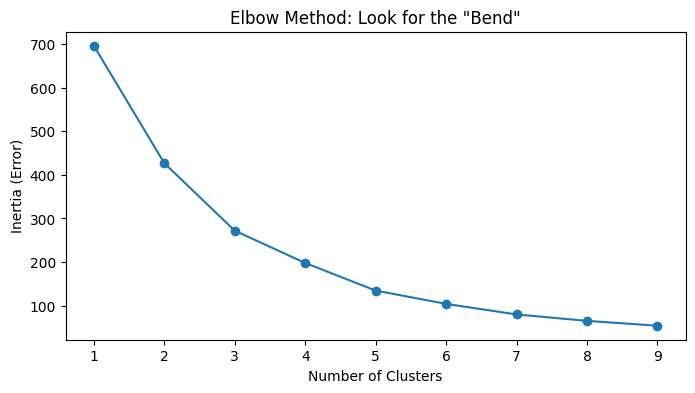

In [80]:
inertia = []
K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method: Look for the "Bend"')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Error)')
plt.show()

In [81]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
airport_profiles['Cluster_Label'] = kmeans.fit_predict(X_scaled)

print("Cluster Interpretations:")
print(airport_profiles.groupby('Cluster_Label').mean())

Cluster Interpretations:
               Traffic_Volume  Avg_Delay_Minutes
Cluster_Label                                   
0                 2007.656566          10.827840
1                27022.925926          14.515479
2                  612.319588           2.828544
3                  278.000000          22.079693


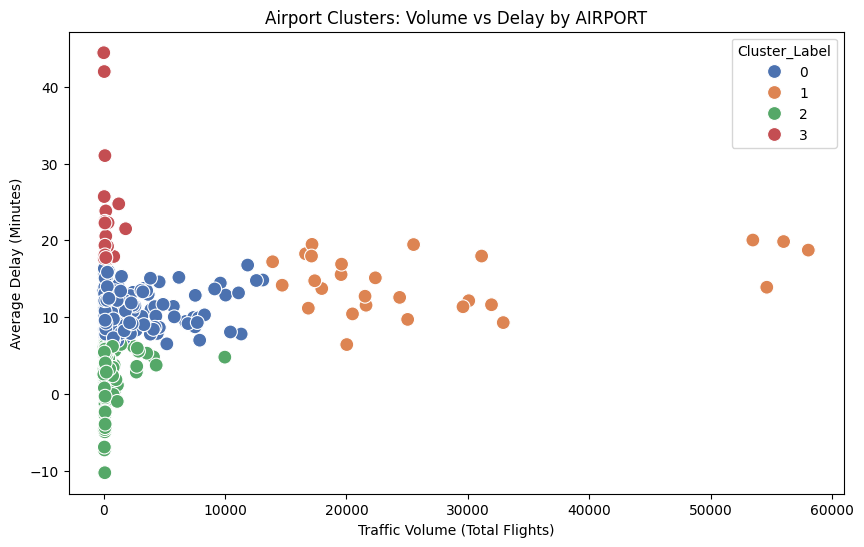

In [82]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=airport_profiles, x='Traffic_Volume', y='Avg_Delay_Minutes', 
                hue='Cluster_Label', palette='deep', s=100)
plt.title('Airport Clusters: Volume vs Delay by AIRPORT')
plt.xlabel('Traffic Volume (Total Flights)')
plt.ylabel('Average Delay (Minutes)')
plt.show()

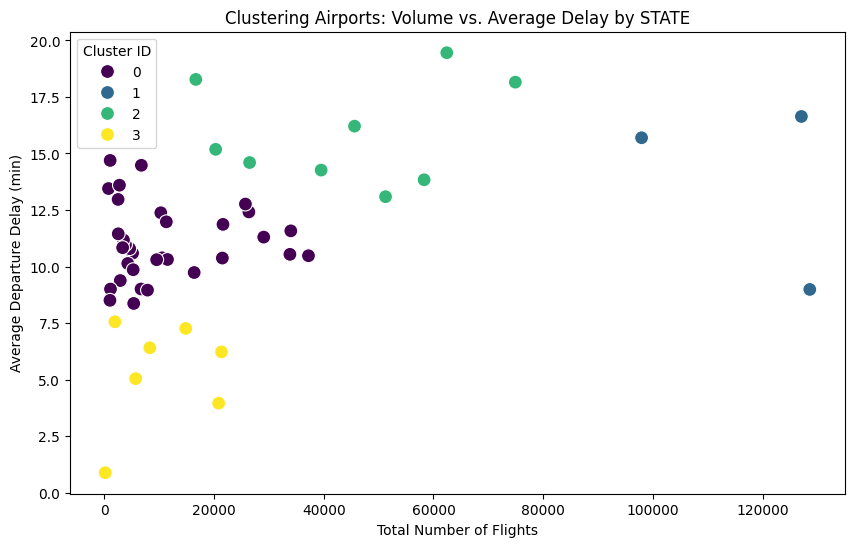

Airports in the highest delay cluster: ['Colorado', 'Georgia', 'Illinois', 'Maryland', 'New Jersey', 'New York', 'North Carolina', 'Pennsylvania', 'Virginia']


In [83]:

airport_stats = df.groupby('ORIGIN_STATE_NM').agg({
    'DEP_DELAY': 'mean',        
    'FL_DATE': 'count',         
    
}).rename(columns={'FL_DATE': 'TOTAL_FLIGHTS'})

scaler = StandardScaler()
X_cluster = scaler.fit_transform(airport_stats)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
airport_stats['Cluster'] = kmeans.fit_predict(X_cluster)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=airport_stats, x='TOTAL_FLIGHTS', y='DEP_DELAY', 
                hue='Cluster', palette='viridis', s=100)

plt.title('Clustering Airports: Volume vs. Average Delay by STATE')
plt.xlabel('Total Number of Flights')
plt.ylabel('Average Departure Delay (min)')
plt.legend(title='Cluster ID')
plt.show()

worst_cluster = airport_stats.groupby('Cluster')['DEP_DELAY'].mean().idxmax()
print("Airports in the highest delay cluster:", 
      airport_stats[airport_stats['Cluster'] == worst_cluster].index.tolist()[:10])

In [84]:
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST,DEST_CITY_NAME,DEST_STATE_NM,...,CRS_DEP_TIME_COS,DEP_TIME_MIN,DEP_TIME_SIN,DEP_TIME_COS,CRS_ARR_TIME_MIN,CRS_ARR_TIME_SIN,CRS_ARR_TIME_COS,ARR_TIME_MIN,ARR_TIME_SIN,ARR_TIME_COS
0,1,5,2025-08-01,AA,ABQ,"Albuquerque, NM",New Mexico,DFW,"Dallas/Fort Worth, TX",Texas,...,2.588190e-01,290,0.953717,0.300706,472,0.882948,-0.469472,449,0.925541,-0.378649
1,1,5,2025-08-01,AA,ABQ,"Albuquerque, NM",New Mexico,DFW,"Dallas/Fort Worth, TX",Texas,...,6.123234e-17,367,0.999534,-0.030539,532,0.731354,-0.681998,538,0.713250,-0.700909
2,1,5,2025-08-01,AA,ABQ,"Albuquerque, NM",New Mexico,DFW,"Dallas/Fort Worth, TX",Texas,...,-5.735764e-01,612,0.453990,-0.891007,671,0.212178,-0.977231,779,-0.254602,-0.967046
3,1,5,2025-08-01,AA,ABQ,"Albuquerque, NM",New Mexico,DFW,"Dallas/Fort Worth, TX",Texas,...,-9.381913e-01,641,0.337917,-0.941176,808,-0.374607,-0.927184,814,-0.398749,-0.917060
4,1,5,2025-08-01,AA,ABQ,"Albuquerque, NM",New Mexico,DFW,"Dallas/Fort Worth, TX",Texas,...,-2.376859e-01,1105,-0.994056,0.108867,1200,-0.866025,0.500000,1272,-0.669131,0.743145


In [85]:
df.columns

Index(['DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE', 'OP_UNIQUE_CARRIER', 'ORIGIN',
       'ORIGIN_CITY_NAME', 'ORIGIN_STATE_NM', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_NM', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY',
       'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'DISTANCE', 'CRS_DEP_TIME_MIN',
       'CRS_DEP_TIME_SIN', 'CRS_DEP_TIME_COS', 'DEP_TIME_MIN', 'DEP_TIME_SIN',
       'DEP_TIME_COS', 'CRS_ARR_TIME_MIN', 'CRS_ARR_TIME_SIN',
       'CRS_ARR_TIME_COS', 'ARR_TIME_MIN', 'ARR_TIME_SIN', 'ARR_TIME_COS'],
      dtype='object')

In [86]:
airplane_profiles = df.groupby('OP_UNIQUE_CARRIER').agg({
    'FL_DATE': 'count',           
    'DEP_DELAY': 'mean',          
             
}).rename(columns={
    'FL_DATE': 'Traffic_Volume',
    'DEP_DELAY': 'Avg_Delay_Minutes',
    
    
})

print("Airport Profiles Created:")
print(airplane_profiles.head())

Airport Profiles Created:
                   Traffic_Volume  Avg_Delay_Minutes
OP_UNIQUE_CARRIER                                   
AA                         162246          18.859707
AS                          45509          10.884968
B6                          38943          17.100840
DL                         180012           9.690604
F9                          31802          17.610811


In [87]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(airplane_profiles)
X_scaled_df = pd.DataFrame(X_scaled, columns=airplane_profiles.columns, index=airplane_profiles.index)

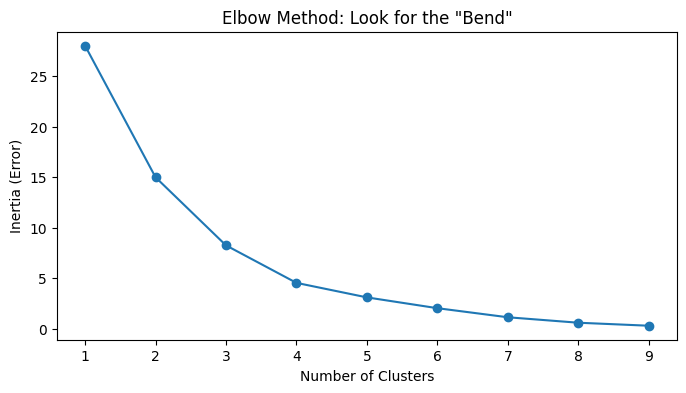

In [88]:
inertia = []
K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

# Plot the Elbow
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method: Look for the "Bend"')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Error)')
plt.show()

In [89]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
airplane_profiles['Cluster_Label'] = kmeans.fit_predict(X_scaled)

print("Cluster Interpretations:")
print(airplane_profiles.groupby('Cluster_Label').mean())

Cluster Interpretations:
               Traffic_Volume  Avg_Delay_Minutes
Cluster_Label                                   
0                37662.833333           9.587747
1               171667.200000          13.490329
2                36481.666667          16.283453


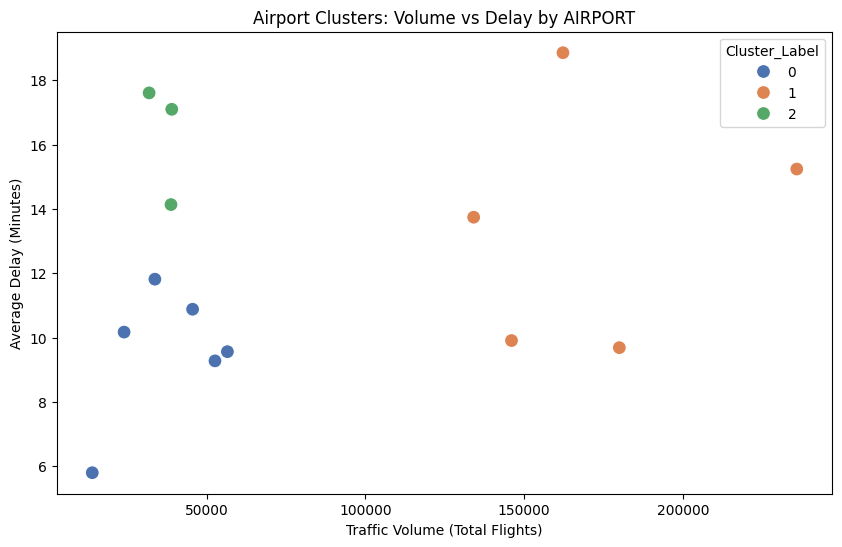

In [90]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=airplane_profiles, x='Traffic_Volume', y='Avg_Delay_Minutes', 
                hue='Cluster_Label', palette='deep', s=100)
plt.title('Airport Clusters: Volume vs Delay by AIRPORT')
plt.xlabel('Traffic Volume (Total Flights)')
plt.ylabel('Average Delay (Minutes)')
plt.show()

In [91]:

df['AIRPORT_CLUSTER'] = df['ORIGIN'].map(airport_profiles['Cluster_Label'])



In [92]:

df['STATE_CLUSTER'] = df['ORIGIN_STATE_NM'].map(airport_stats['Cluster'])
df['carrier_cluster']=df['OP_UNIQUE_CARRIER'].map(airplane_profiles['Cluster_Label'])



In [93]:
df.isnull().sum()   

DAY_OF_MONTH         0
DAY_OF_WEEK          0
FL_DATE              0
OP_UNIQUE_CARRIER    0
ORIGIN               0
ORIGIN_CITY_NAME     0
ORIGIN_STATE_NM      0
DEST                 0
DEST_CITY_NAME       0
DEST_STATE_NM        0
CRS_DEP_TIME         0
DEP_TIME             0
DEP_DELAY            0
CRS_ARR_TIME         0
ARR_TIME             0
ARR_DELAY            0
DISTANCE             0
CRS_DEP_TIME_MIN     0
CRS_DEP_TIME_SIN     0
CRS_DEP_TIME_COS     0
DEP_TIME_MIN         0
DEP_TIME_SIN         0
DEP_TIME_COS         0
CRS_ARR_TIME_MIN     0
CRS_ARR_TIME_SIN     0
CRS_ARR_TIME_COS     0
ARR_TIME_MIN         0
ARR_TIME_SIN         0
ARR_TIME_COS         0
AIRPORT_CLUSTER      0
STATE_CLUSTER        0
carrier_cluster      0
dtype: int64

In [94]:
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST,DEST_CITY_NAME,DEST_STATE_NM,...,DEP_TIME_COS,CRS_ARR_TIME_MIN,CRS_ARR_TIME_SIN,CRS_ARR_TIME_COS,ARR_TIME_MIN,ARR_TIME_SIN,ARR_TIME_COS,AIRPORT_CLUSTER,STATE_CLUSTER,carrier_cluster
0,1,5,2025-08-01,AA,ABQ,"Albuquerque, NM",New Mexico,DFW,"Dallas/Fort Worth, TX",Texas,...,0.300706,472,0.882948,-0.469472,449,0.925541,-0.378649,0,0,1
1,1,5,2025-08-01,AA,ABQ,"Albuquerque, NM",New Mexico,DFW,"Dallas/Fort Worth, TX",Texas,...,-0.030539,532,0.731354,-0.681998,538,0.713250,-0.700909,0,0,1
2,1,5,2025-08-01,AA,ABQ,"Albuquerque, NM",New Mexico,DFW,"Dallas/Fort Worth, TX",Texas,...,-0.891007,671,0.212178,-0.977231,779,-0.254602,-0.967046,0,0,1
3,1,5,2025-08-01,AA,ABQ,"Albuquerque, NM",New Mexico,DFW,"Dallas/Fort Worth, TX",Texas,...,-0.941176,808,-0.374607,-0.927184,814,-0.398749,-0.917060,0,0,1
4,1,5,2025-08-01,AA,ABQ,"Albuquerque, NM",New Mexico,DFW,"Dallas/Fort Worth, TX",Texas,...,0.108867,1200,-0.866025,0.500000,1272,-0.669131,0.743145,0,0,1


In [95]:
df.isnull().sum()

DAY_OF_MONTH         0
DAY_OF_WEEK          0
FL_DATE              0
OP_UNIQUE_CARRIER    0
ORIGIN               0
ORIGIN_CITY_NAME     0
ORIGIN_STATE_NM      0
DEST                 0
DEST_CITY_NAME       0
DEST_STATE_NM        0
CRS_DEP_TIME         0
DEP_TIME             0
DEP_DELAY            0
CRS_ARR_TIME         0
ARR_TIME             0
ARR_DELAY            0
DISTANCE             0
CRS_DEP_TIME_MIN     0
CRS_DEP_TIME_SIN     0
CRS_DEP_TIME_COS     0
DEP_TIME_MIN         0
DEP_TIME_SIN         0
DEP_TIME_COS         0
CRS_ARR_TIME_MIN     0
CRS_ARR_TIME_SIN     0
CRS_ARR_TIME_COS     0
ARR_TIME_MIN         0
ARR_TIME_SIN         0
ARR_TIME_COS         0
AIRPORT_CLUSTER      0
STATE_CLUSTER        0
carrier_cluster      0
dtype: int64

Cluster    | Model Name           | RMSE (min)
---------------------------------------------
0          | Linear Regression    | 14.00|9.45
0          | Ridge (L2)           | 14.00|9.45
0          | Lasso (L1)           | 14.02|9.45
0          | Decision Tree        | 14.18|9.52
0          | Random Forest        | 13.95|9.40
0          | Gradient Boosting    | 13.82|9.30
0          | XGBoost              | 13.78|9.28
0          | KNN (Neighbors)      | 14.89|10.14
---------------------------------------------
1          | Linear Regression    | 15.15|10.19
1          | Ridge (L2)           | 15.15|10.19
1          | Lasso (L1)           | 15.18|10.20
1          | Decision Tree        | 15.26|10.25
1          | Random Forest        | 15.11|10.16
1          | Gradient Boosting    | 15.02|10.08
1          | XGBoost              | 15.01|10.08
1          | KNN (Neighbors)      | 16.19|11.06
---------------------------------------------
2          | Linear Regression    | 11.18|7.70
2      

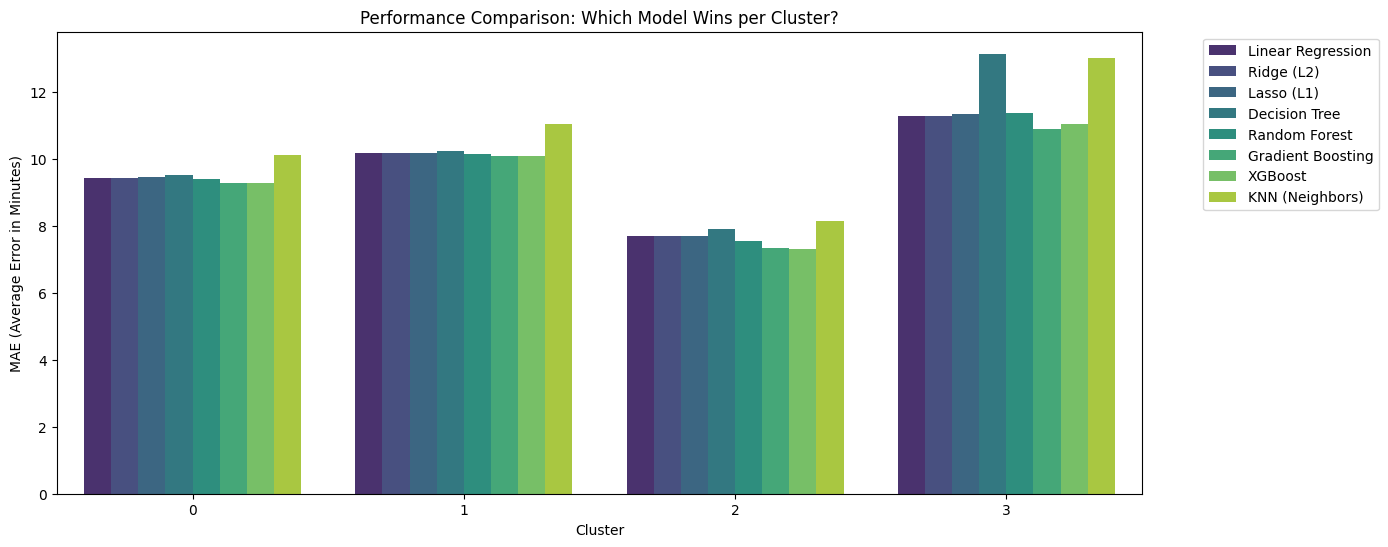

In [96]:
features = ['DAY_OF_WEEK', 'DEP_DELAY','CRS_DEP_TIME_MIN','DEP_TIME_MIN','CRS_ARR_TIME_MIN','CRS_DEP_TIME_COS','CRS_DEP_TIME_SIN','DEP_TIME_COS','DEP_TIME_SIN', 'CRS_ARR_TIME_COS','CRS_ARR_TIME_SIN','DISTANCE'] 
target = 'ARR_DELAY'

unique_clusters = df['AIRPORT_CLUSTER'].unique()

models_to_test = [
    ("Linear Regression", LinearRegression()),
    ("Ridge (L2)", Ridge(alpha=1.0)),
    ("Lasso (L1)", Lasso(alpha=0.1)),
    ("Decision Tree", DecisionTreeRegressor(max_depth=10, random_state=42)),
    ("Random Forest", RandomForestRegressor(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42)),
    ("Gradient Boosting", GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42)),
    ("XGBoost", XGBRegressor(n_estimators=100, learning_rate=0.1, n_jobs=-1, random_state=42)),
    ("KNN (Neighbors)", KNeighborsRegressor(n_neighbors=5, n_jobs=-1))
]

results = []

print(f"{'Cluster':<10} | {'Model Name':<20} | {'RMSE (min)':<10}")
print("-" * 45)

for cluster_id in unique_clusters:
    cluster_data = df[df['AIRPORT_CLUSTER'] == cluster_id].copy()
    cluster_data = cluster_data.dropna(subset=[target] + features)
    
    
    X = cluster_data[features]
    scaler = StandardScaler()
    X = pd.DataFrame(scaler.fit_transform(X), columns=features, index=X.index)
    y = cluster_data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    for model_name, model in models_to_test:
        
        try:
            model.fit(X_train, y_train)
            predictions = model.predict(X_test)

            mse = mean_squared_error(y_test, predictions)
            mae=mean_absolute_error(y_test,predictions)

            rmse = np.sqrt(mse)


            print(f"{cluster_id:<10} | {model_name:<20} | {rmse:.2f}|{mae:.2f}")

            results.append({
                'Cluster': cluster_id,
                'Model': model_name,
                'RMSE': rmse,
                'mae': mae
            })
            
        except Exception as e:
            print(f"Error with {model_name} on Cluster {cluster_id}: {e}")

    print("-" * 45)

results_df = pd.DataFrame(results)


pivot_results = results_df.pivot(index='Cluster', columns='Model', values='RMSE')
print("\nSummary Comparison (RMSE - Lower is Better):")
print(pivot_results)
pivot_results1 = results_df.pivot(index='Cluster', columns='Model', values='mae')
print("\nSummary Comparison (MAE - Lower is Better):")
print(pivot_results1)

print("\n🏆 Best Model per Cluster:")
for cluster_id in unique_clusters:
    if cluster_id in pivot_results.index:
        best_model = pivot_results.loc[cluster_id].idxmin()
        best_score = pivot_results.loc[cluster_id].min()
        print(f"Cluster {cluster_id}: {best_model} (RMSE: {best_score:.2f})")

plt.figure(figsize=(14, 6))
sns.barplot(data=results_df, x='Cluster', y='mae', hue='Model', palette='viridis')
plt.title('Performance Comparison: Which Model Wins per Cluster?')
plt.ylabel('MAE (Average Error in Minutes)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Cluster    | Model Name           | RMSE (min)
---------------------------------------------
1          | Linear Regression    | 15.15|10.19
1          | Ridge (L2)           | 15.15|10.19
1          | Lasso (L1)           | 15.18|10.20
1          | Decision Tree        | 15.26|10.25
1          | Random Forest        | 15.11|10.16
1          | Gradient Boosting    | 15.02|10.08
1          | XGBoost              | 15.01|10.08
1          | KNN (Neighbors)      | 16.19|11.06
---------------------------------------------
0          | Linear Regression    | 14.00|9.45
0          | Ridge (L2)           | 14.00|9.45
0          | Lasso (L1)           | 14.02|9.45
0          | Decision Tree        | 14.18|9.52
0          | Random Forest        | 13.95|9.40
0          | Gradient Boosting    | 13.82|9.30
0          | XGBoost              | 13.78|9.28
0          | KNN (Neighbors)      | 14.89|10.14
---------------------------------------------
2          | Linear Regression    | 11.18|7.70
2      

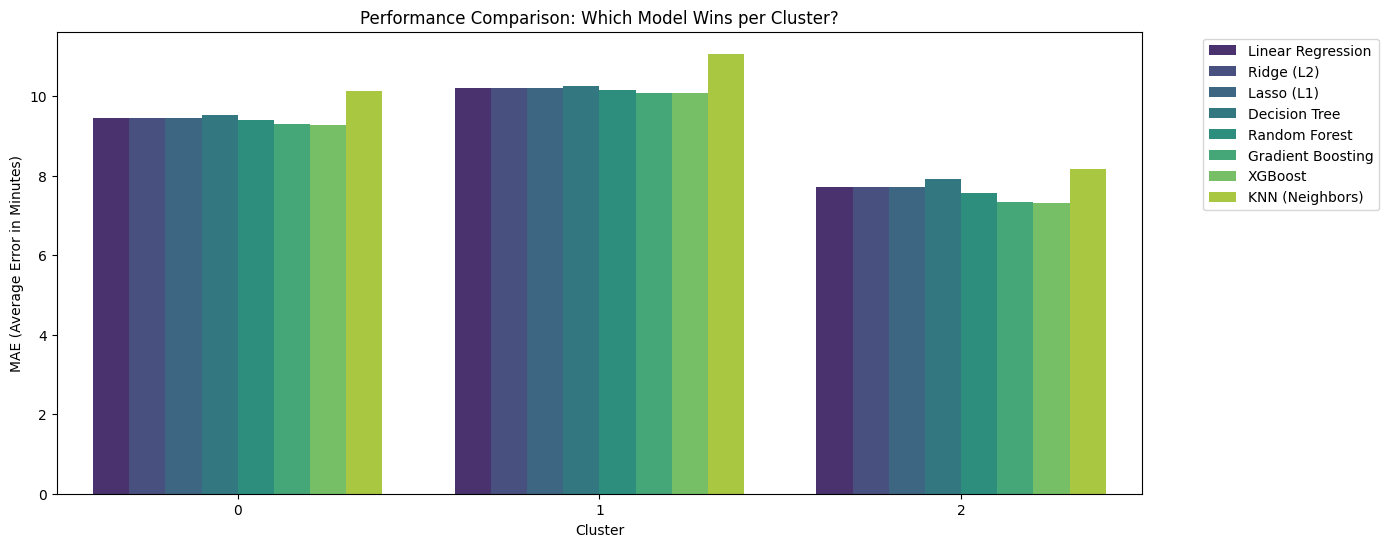

In [97]:

features = ['DAY_OF_WEEK', 'DEP_DELAY','CRS_DEP_TIME_MIN','DEP_TIME_MIN','CRS_ARR_TIME_MIN','CRS_DEP_TIME_COS','CRS_DEP_TIME_SIN','DEP_TIME_COS','DEP_TIME_SIN', 'CRS_ARR_TIME_COS','CRS_ARR_TIME_SIN','DISTANCE'] 
target = 'ARR_DELAY'

unique_clusters = df['carrier_cluster'].unique()

models_to_test = [
    ("Linear Regression", LinearRegression()),
    ("Ridge (L2)", Ridge(alpha=1.0)),
    ("Lasso (L1)", Lasso(alpha=0.1)),
    ("Decision Tree", DecisionTreeRegressor(max_depth=10, random_state=42)),
    ("Random Forest", RandomForestRegressor(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42)),
    ("Gradient Boosting", GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42)),
    ("XGBoost", XGBRegressor(n_estimators=100, learning_rate=0.1, n_jobs=-1, random_state=42)),
    ("KNN (Neighbors)", KNeighborsRegressor(n_neighbors=5, n_jobs=-1))
]

results = []

print(f"{'Cluster':<10} | {'Model Name':<20} | {'RMSE (min)':<10}")
print("-" * 45)

for cluster_id in unique_clusters:

    cluster_data = df[df['AIRPORT_CLUSTER'] == cluster_id].copy()
    

    cluster_data = cluster_data.dropna(subset=[target] + features)


    if len(cluster_data) < 50:
        continue
    
    X = cluster_data[features]
    y = cluster_data[target]
    scaler = StandardScaler()
    X = pd.DataFrame(scaler.fit_transform(X), columns=features, index=X.index)
    

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    

    for model_name, model in models_to_test:

        try:
            model.fit(X_train, y_train)
  
            predictions = model.predict(X_test)
     
            mse = mean_squared_error(y_test, predictions)
            mae=mean_absolute_error(y_test,predictions)

            rmse = np.sqrt(mse)
            
  
            print(f"{cluster_id:<10} | {model_name:<20} | {rmse:.2f}|{mae:.2f}")
            

            results.append({
                'Cluster': cluster_id,
                'Model': model_name,
                'RMSE': rmse
                ,'mae':mae
            })
            
        except Exception as e:
            print(f"Error with {model_name} on Cluster {cluster_id}: {e}")

    print("-" * 45)


results_df = pd.DataFrame(results)


pivot_results = results_df.pivot(index='Cluster', columns='Model', values='RMSE')
print("\nSummary Comparison (RMSE - Lower is Better):")
print(pivot_results)

pivot_results1 = results_df.pivot(index='Cluster', columns='Model', values='mae')
print("\nSummary Comparison (MAE - Lower is Better):")
print(pivot_results1)


print("\n🏆 Best Model per Cluster:")
for cluster_id in unique_clusters:
    if cluster_id in pivot_results.index:
        best_model = pivot_results.loc[cluster_id].idxmin()
        best_score = pivot_results.loc[cluster_id].min()
        print(f"Cluster {cluster_id}: {best_model} (RMSE: {best_score:.2f})")


plt.figure(figsize=(14, 6))
sns.barplot(data=results_df, x='Cluster', y='mae', hue='Model', palette='viridis')
plt.title('Performance Comparison: Which Model Wins per Cluster?')
plt.ylabel('MAE (Average Error in Minutes)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [98]:
df.columns

Index(['DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE', 'OP_UNIQUE_CARRIER', 'ORIGIN',
       'ORIGIN_CITY_NAME', 'ORIGIN_STATE_NM', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_NM', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY',
       'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'DISTANCE', 'CRS_DEP_TIME_MIN',
       'CRS_DEP_TIME_SIN', 'CRS_DEP_TIME_COS', 'DEP_TIME_MIN', 'DEP_TIME_SIN',
       'DEP_TIME_COS', 'CRS_ARR_TIME_MIN', 'CRS_ARR_TIME_SIN',
       'CRS_ARR_TIME_COS', 'ARR_TIME_MIN', 'ARR_TIME_SIN', 'ARR_TIME_COS',
       'AIRPORT_CLUSTER', 'STATE_CLUSTER', 'carrier_cluster'],
      dtype='object')

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
# ... (rest of your imports)

# 1. Define feature sets
numerical_features = [
    'DAY_OF_WEEK', 'DISTANCE', 'DEP_DELAY', 'CRS_DEP_TIME_MIN', 
    'DEP_TIME_MIN', 'CRS_ARR_TIME_MIN', 'CRS_DEP_TIME_SIN', 
    'CRS_DEP_TIME_COS', 'DEP_TIME_SIN', 'DEP_TIME_COS', 
    'CRS_ARR_TIME_SIN', 'CRS_ARR_TIME_COS'
]

# categorical_features = [
#     'OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST', 
#     'ORIGIN_CITY_NAME', 'ORIGIN_STATE_NM', 
#     'DEST_CITY_NAME', 'DEST_STATE_NM'
# ]

features = numerical_features 
# + 
# categorical_features
target = 'ARR_DELAY'

def run_cluster_analysis(df, cluster_col):
    unique_clusters = df[cluster_col].unique()
    results = []

    print(f"\n\n{'='*20} ANALYZING BY: {cluster_col} {'='*20}")
    print(f"{'Cluster':<10} | {'Model Name':<20} | {'RMSE':<10} | {'MAE':<10}")
    print("-" * 60)

    for cluster_id in unique_clusters:
        cluster_data = df[df[cluster_col] == cluster_id].copy()
        cluster_data = cluster_data.dropna(subset=[target] + features)

        if len(cluster_data) < 100:
            continue
        
        X = cluster_data[features]
        y = cluster_data[target]

        # Split before encoding to prevent leakage
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Better Implementation: Ordinal Encoding for high-cardinality strings
        encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
        # X_train[categorical_features] = encoder.fit_transform(X_train[categorical_features])
        # X_test[categorical_features] = encoder.transform(X_test[categorical_features])

        # Scaler for KNN
        scaler = StandardScaler()
        X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=features)
        X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=features)

        models_to_test = [
            ("Decision Tree", DecisionTreeRegressor(max_depth=10, random_state=42)),
            ("Random Forest", RandomForestRegressor(n_estimators=40, max_depth=10, n_jobs=-1, random_state=42)),
            ("Gradient Boosting", GradientBoostingRegressor(n_estimators=80, learning_rate=0.1, random_state=42)),
            ("XGBoost", XGBRegressor(n_estimators=50, learning_rate=0.1, n_jobs=-1, random_state=42)),
            ("KNN", KNeighborsRegressor(n_neighbors=50, n_jobs=-1))
        ]

        for model_name, model in models_to_test:
            try:
                # Use scaled data for KNN, original encoded data for trees
                X_tr = X_train_scaled if model_name == "KNN" else X_train
                X_ts = X_test_scaled if model_name == "KNN" else X_test
                
                model.fit(X_tr, y_train)
                predictions = model.predict(X_ts)
                
                rmse = np.sqrt(mean_squared_error(y_test, predictions))
                mae = mean_absolute_error(y_test, predictions)

                print(f"{cluster_id:<10} | {model_name:<20} | {rmse:.2f} | {mae:.2f}")
                
                results.append({
                    'Method': cluster_col,
                    'Cluster': cluster_id,
                    'Model': model_name,
                    'RMSE': rmse,
                    'MAE': mae
                })
            except Exception as e:
                print(f"Error with {model_name} on Cluster {cluster_id}: {e}")
        print("-" * 60)
    
    return results

# 2. Loop through all three methods
clustering_methods = ['AIRPORT_CLUSTER', 'STATE_CLUSTER', 'carrier_cluster']
total_results = []

for method in clustering_methods:
    method_results = run_cluster_analysis(df, method)
    total_results.extend(method_results)

# 3. Final Summary Reporting (as per your previous format)
results_df = pd.DataFrame(total_results)

for method in clustering_methods:
    method_subset = results_df[results_df['Method'] == method]
    
    print(f"\n🏆 Best Model per {method}:")
    pivot_rmse = method_subset.pivot(index='Cluster', columns='Model', values='RMSE')
    for cluster_id in pivot_rmse.index:
        best_model = pivot_rmse.loc[cluster_id].idxmin()
        best_score = pivot_rmse.loc[cluster_id].min()
        print(f"Cluster {cluster_id}: {best_model} (RMSE: {best_score:.2f})")






==================== ANALYZING BY: AIRPORT_CLUSTER ====================
Cluster    | Model Name           | RMSE       | MAE       
------------------------------------------------------------
0          | Decision Tree        | 14.17 | 9.52
0          | Random Forest        | 13.95 | 9.40
0          | Gradient Boosting    | 13.92 | 9.38
0          | XGBoost              | 13.92 | 9.38
0          | KNN                  | 14.17 | 9.54
------------------------------------------------------------
1          | Decision Tree        | 15.27 | 10.25
1          | Random Forest        | 15.11 | 10.16
1          | Gradient Boosting    | 15.09 | 10.14
1          | XGBoost              | 15.09 | 10.14
1          | KNN                  | 15.30 | 10.28
------------------------------------------------------------
2          | Decision Tree        | 11.71 | 7.92
2          | Random Forest        | 11.06 | 7.57
2          | Gradient Boosting    | 11.01 | 7.55
2          | XGBoost              | 10.98

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
# ... (rest of your imports)

# 1. Define feature sets
numerical_features = [
    'DAY_OF_WEEK', 'DISTANCE', 'DEP_DELAY', 'CRS_DEP_TIME_MIN', 
    'DEP_TIME_MIN', 'CRS_ARR_TIME_MIN', 'CRS_DEP_TIME_SIN', 
    'CRS_DEP_TIME_COS', 'DEP_TIME_SIN', 'DEP_TIME_COS', 
    'CRS_ARR_TIME_SIN', 'CRS_ARR_TIME_COS'
]

categorical_features = [
    'OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST', 
    'ORIGIN_CITY_NAME', 'ORIGIN_STATE_NM', 
    'DEST_CITY_NAME', 'DEST_STATE_NM'
]

features = numerical_features + categorical_features
target = 'ARR_DELAY'

def run_cluster_analysis(df, cluster_col):
    unique_clusters = df[cluster_col].unique()
    results = []

    print(f"\n\n{'='*20} ANALYZING BY: {cluster_col} {'='*20}")
    print(f"{'Cluster':<10} | {'Model Name':<20} | {'RMSE':<10} | {'MAE':<10}")
    print("-" * 60)

    for cluster_id in unique_clusters:
        cluster_data = df[df[cluster_col] == cluster_id].copy()
        cluster_data = cluster_data.dropna(subset=[target] + features)

        if len(cluster_data) < 100:
            continue
        
        X = cluster_data[features]
        y = cluster_data[target]

        # Split before encoding to prevent leakage
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Better Implementation: Ordinal Encoding for high-cardinality strings
        encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
        X_train[categorical_features] = encoder.fit_transform(X_train[categorical_features])
        X_test[categorical_features] = encoder.transform(X_test[categorical_features])

        # Scaler for KNN
        scaler = StandardScaler()
        X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=features)
        X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=features)

        models_to_test = [
            ("Decision Tree", DecisionTreeRegressor(max_depth=10, random_state=42)),
            ("Random Forest", RandomForestRegressor(n_estimators=40, max_depth=10, n_jobs=-1, random_state=42)),
            ("Gradient Boosting", GradientBoostingRegressor(n_estimators=80, learning_rate=0.1, random_state=42)),
            ("XGBoost", XGBRegressor(n_estimators=50, learning_rate=0.1, n_jobs=-1, random_state=42)),
            ("KNN", KNeighborsRegressor(n_neighbors=50, n_jobs=-1))
        ]

        for model_name, model in models_to_test:
            try:
                # Use scaled data for KNN, original encoded data for trees
                X_tr = X_train_scaled if model_name == "KNN" else X_train
                X_ts = X_test_scaled if model_name == "KNN" else X_test
                
                model.fit(X_tr, y_train)
                predictions = model.predict(X_ts)
                
                rmse = np.sqrt(mean_squared_error(y_test, predictions))
                mae = mean_absolute_error(y_test, predictions)

                print(f"{cluster_id:<10} | {model_name:<20} | {rmse:.2f} | {mae:.2f}")
                
                results.append({
                    'Method': cluster_col,
                    'Cluster': cluster_id,
                    'Model': model_name,
                    'RMSE': rmse,
                    'MAE': mae
                })
            except Exception as e:
                print(f"Error with {model_name} on Cluster {cluster_id}: {e}")
        print("-" * 60)
    
    return results

# 2. Loop through all three methods
clustering_methods = ['AIRPORT_CLUSTER', 'STATE_CLUSTER', 'carrier_cluster']
total_results = []

for method in clustering_methods:
    method_results = run_cluster_analysis(df, method)
    total_results.extend(method_results)

# 3. Final Summary Reporting (as per your previous format)
results_df = pd.DataFrame(total_results)

for method in clustering_methods:
    method_subset = results_df[results_df['Method'] == method]
    
    print(f"\n🏆 Best Model per {method}:")
    pivot_rmse = method_subset.pivot(index='Cluster', columns='Model', values='RMSE')
    for cluster_id in pivot_rmse.index:
        best_model = pivot_rmse.loc[cluster_id].idxmin()
        best_score = pivot_rmse.loc[cluster_id].min()
        print(f"Cluster {cluster_id}: {best_model} (RMSE: {best_score:.2f})")



==================== ANALYZING BY: AIRPORT_CLUSTER ====================
Cluster    | Model Name           | RMSE       | MAE       
------------------------------------------------------------
0          | Decision Tree        | 14.08 | 9.40
0          | Random Forest        | 13.75 | 9.23
0          | Gradient Boosting    | 13.73 | 9.20
0          | XGBoost              | 13.65 | 9.15
0          | KNN                  | 16.30 | 11.28
------------------------------------------------------------
1          | Decision Tree        | 15.24 | 10.20
1          | Random Forest        | 15.03 | 10.08
1          | Gradient Boosting    | 15.01 | 10.05
1          | XGBoost              | 14.95 | 10.01
1          | KNN                  | 17.38 | 12.02
------------------------------------------------------------
2          | Decision Tree        | 11.61 | 7.75
2          | Random Forest        | 10.88 | 7.34
2          | Gradient Boosting    | 10.76 | 7.27
2          | XGBoost              | 10.7

Cluster    | Model Name           | RMSE (min)
---------------------------------------------
0          | Decision Tree        | 13.97|9.52
0          | Random Forest        | 13.73|9.40
0          | Gradient Boosting    | 13.69|9.38
0          | XGBoost              | 13.71|9.39
0          | KNN (Neighbors)      | 14.00|9.57
---------------------------------------------
2          | Decision Tree        | 16.19|10.78
2          | Random Forest        | 15.93|10.63
2          | Gradient Boosting    | 15.89|10.61
2          | XGBoost              | 15.88|10.60
2          | KNN (Neighbors)      | 16.17|10.79
---------------------------------------------
1          | Decision Tree        | 14.51|9.68
1          | Random Forest        | 14.25|9.54
1          | Gradient Boosting    | 14.21|9.50
1          | XGBoost              | 14.21|9.51
1          | KNN (Neighbors)      | 14.53|9.70
---------------------------------------------
3          | Decision Tree        | 11.88|8.10
3          |

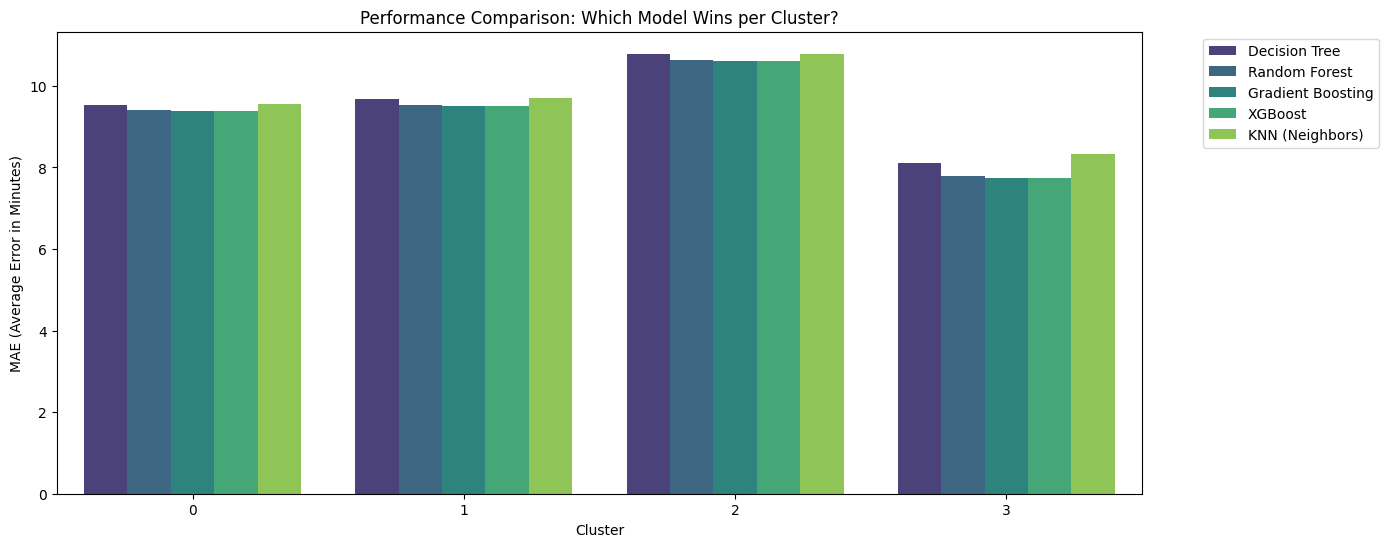

In [101]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor


features = ['DAY_OF_WEEK','DISTANCE','DEP_DELAY','CRS_DEP_TIME_MIN','DEP_TIME_MIN','CRS_ARR_TIME_MIN','CRS_DEP_TIME_SIN','CRS_DEP_TIME_COS','DEP_TIME_SIN','DEP_TIME_COS', 'CRS_ARR_TIME_SIN','CRS_ARR_TIME_COS'] 
target = 'ARR_DELAY'


unique_clusters = df['STATE_CLUSTER'].unique()


models_to_test = [
   
    ("Decision Tree", DecisionTreeRegressor(max_depth=10, random_state=42)),
    ("Random Forest", RandomForestRegressor(n_estimators=40, max_depth=10, n_jobs=-1, random_state=42)),
    ("Gradient Boosting", GradientBoostingRegressor(n_estimators=80,learning_rate=0.1, random_state=42)),
    ("XGBoost", XGBRegressor(n_estimators=50,learning_rate=0.1, n_jobs=-1, random_state=42)),
    ("KNN (Neighbors)", KNeighborsRegressor(n_neighbors=50, n_jobs=-1))
]

results = []

print(f"{'Cluster':<10} | {'Model Name':<20} | {'RMSE (min)':<10}")
print("-" * 45)

for cluster_id in unique_clusters:
    
    cluster_data = df[df['STATE_CLUSTER'] == cluster_id].copy()
    
 
    cluster_data = cluster_data.dropna(subset=[target] + features)

    
    if len(cluster_data) < 50:
        continue
    
    X = cluster_data[features]
    y = cluster_data[target]
    scaler = StandardScaler()
    X = pd.DataFrame(scaler.fit_transform(X), columns=features, index=X.index)
    

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    

    for model_name, model in models_to_test:
        
        
        try:
            model.fit(X_train, y_train)
            
           
            predictions = model.predict(X_test)
            
          
            mse = mean_squared_error(y_test, predictions)
            mae=mean_absolute_error(y_test,predictions)
            rmse = np.sqrt(mse)



            print(f"{cluster_id:<10} | {model_name:<20} | {rmse:.2f}|{mae:.2f}")
            
         
            results.append({
                'Cluster': cluster_id,
                'Model': model_name,
                'RMSE': rmse,
                'mae': mae
            })
            
        except Exception as e:
            print(f"Error with {model_name} on Cluster {cluster_id}: {e}")

    print("-" * 45)


results_df = pd.DataFrame(results)


pivot_results = results_df.pivot(index='Cluster', columns='Model', values='RMSE')
print("\nSummary Comparison (RMSE - Lower is Better):")
print(pivot_results)

pivot_results1 = results_df.pivot(index='Cluster', columns='Model', values='mae')
print("\nSummary Comparison (MAE - Lower is Better):")
print(pivot_results1)

print("\n🏆 Best Model per Cluster:")
for cluster_id in unique_clusters:
    if cluster_id in pivot_results.index:
        best_model = pivot_results.loc[cluster_id].idxmin()
        best_score = pivot_results.loc[cluster_id].min()
        print(f"Cluster {cluster_id}: {best_model} (RMSE: {best_score:.2f})")

# Visualization
plt.figure(figsize=(14, 6))
sns.barplot(data=results_df, x='Cluster', y='mae', hue='Model', palette='viridis')
plt.title('Performance Comparison: Which Model Wins per Cluster?')
plt.ylabel('MAE (Average Error in Minutes)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training Neural Network...
Epoch 1/50
14593/14593 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - loss: 265.6776 - val_loss: 233.0656
Epoch 2/50
14593/14593 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - loss: 247.3392 - val_loss: 233.2857
Epoch 3/50
14593/14593 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - loss: 242.0582 - val_loss: 243.9418
Epoch 4/50
14593/14593 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - loss: 234.8104 - val_loss: 303.2171
Epoch 5/50
14593/14593 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - loss: 233.9009 - val_loss: 281.5341
Epoch 6/50
14593/14593 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - loss: 233.3261 - val_loss: 290.6005
Epoch 7/50
14593/14593 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - loss: 232.6349 - val_loss: 296.0230
Epoch 8/50
14593/14593 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - loss: 231.4200 - val_loss: 283.9108
Epoch 9/50
14593/14593 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - loss: 231.1371 - val_loss: 277.8166
Epoch 10/50
14593/14593 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - loss: 230.9486 - val_loss: 294.6805
Epoch 11/50
14593/1459

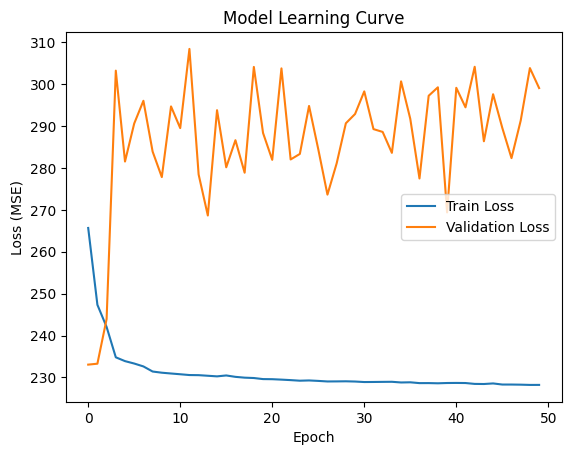

In [102]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


features = ['DAY_OF_WEEK','DISTANCE','DEP_DELAY','CRS_DEP_TIME_MIN','DEP_TIME_MIN','CRS_ARR_TIME_MIN','CRS_DEP_TIME_SIN','CRS_DEP_TIME_COS','DEP_TIME_SIN','DEP_TIME_COS', 'CRS_ARR_TIME_SIN','CRS_ARR_TIME_COS'] 
target = 'ARR_DELAY'


cluster_data = df[df['AIRPORT_CLUSTER'] == 1].dropna(subset=features + [target])

X = cluster_data[features]
y = cluster_data[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = Sequential()


model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))


model.add(Dense(32, activation='relu'))


model.add(Dropout(0.2))

model.add(Dense(16, activation='relu'))

model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse')


print("Training Neural Network...")
history = model.fit(
         X_train_scaled, y_train,
        epochs=50,  
        batch_size=32, 
        validation_split=0.2, 
        verbose=1
)


predictions = model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae=mean_absolute_error(y_test,predictions)

print(f"\nNeural Network RMSE: {rmse:.2f} minutes")
print(f"\nNeural Network MAE: {mae:.2f} minutes")


import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Learning Curve')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend()
plt.show()

C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training Neural Network...
Epoch 1/30
17167/17167 ━━━━━━━━━━━━━━━━━━━━ 48s 3ms/step - loss: 235.8908 - val_loss: 220.8286
Epoch 2/30
17167/17167 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - loss: 210.0339 - val_loss: 228.0665
Epoch 3/30
17167/17167 ━━━━━━━━━━━━━━━━━━━━ 47s 3ms/step - loss: 207.9602 - val_loss: 262.6990
Epoch 4/30
17167/17167 ━━━━━━━━━━━━━━━━━━━━ 46s 3ms/step - loss: 207.7459 - val_loss: 246.6535
Epoch 5/30
17167/17167 ━━━━━━━━━━━━━━━━━━━━ 44s 3ms/step - loss: 207.4031 - val_loss: 249.1244
Epoch 6/30
17167/17167 ━━━━━━━━━━━━━━━━━━━━ 45s 3ms/step - loss: 207.3246 - val_loss: 244.7406
Epoch 7/30
17167/17167 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 206.7518 - val_loss: 260.1284
Epoch 8/30
17167/17167 ━━━━━━━━━━━━━━━━━━━━ 45s 3ms/step - loss: 206.3623 - val_loss: 251.4822
Epoch 9/30
17167/17167 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - loss: 206.3312 - val_loss: 263.0565
Epoch 10/30
17167/17167 ━━━━━━━━━━━━━━━━━━━━ 45s 3ms/step - loss: 206.1018 - val_loss: 260.5714
Epoch 11/30
17167/1716

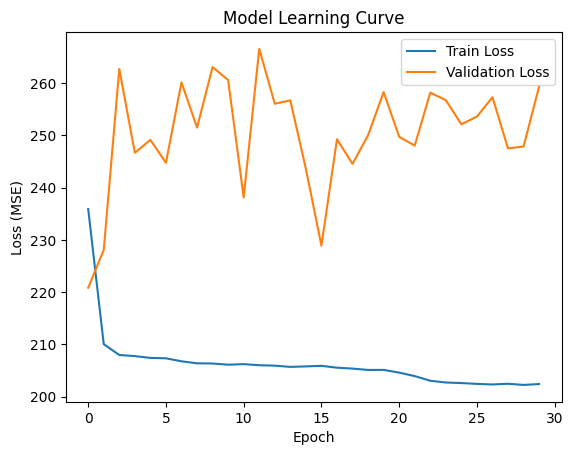

In [103]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


features = ['DAY_OF_WEEK','DISTANCE','DEP_DELAY','CRS_DEP_TIME_MIN','DEP_TIME_MIN','CRS_ARR_TIME_MIN','CRS_DEP_TIME_SIN','CRS_DEP_TIME_COS','DEP_TIME_SIN','DEP_TIME_COS', 'CRS_ARR_TIME_SIN','CRS_ARR_TIME_COS'] 
target = 'ARR_DELAY'


cluster_data = df[df['carrier_cluster'] == 1].dropna(subset=features + [target])

X = cluster_data[features]
y = cluster_data[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = Sequential()


model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))


model.add(Dense(32, activation='relu'))


model.add(Dropout(0.2))

model.add(Dense(16, activation='relu'))

model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse')


print("Training Neural Network...")
history = model.fit(
         X_train_scaled, y_train,
        epochs=30,  
        batch_size=32, 
        validation_split=0.2, 
        verbose=1
)


predictions = model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae=mean_absolute_error(y_test,predictions)

print(f"\nNeural Network RMSE: {rmse:.2f} minutes")
print(f"\nNeural Network MAE: {mae:.2f} minutes")


import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Learning Curve')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Training Neural Network...
Epoch 1/30


C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7070/7070 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 254.1092 - val_loss: 210.0588
Epoch 2/30
7070/7070 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 220.9003 - val_loss: 207.7725
Epoch 3/30
7070/7070 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 219.5717 - val_loss: 214.5509
Epoch 4/30
7070/7070 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 218.8261 - val_loss: 205.2661
Epoch 5/30
7070/7070 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 217.6911 - val_loss: 206.5917
Epoch 6/30
7070/7070 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 216.5758 - val_loss: 209.9854
Epoch 7/30
7070/7070 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 212.8883 - val_loss: 213.7829
Epoch 8/30
7070/7070 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 207.5394 - val_loss: 237.7293
Epoch 9/30
7070/7070 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 205.8774 - val_loss: 228.5797
Epoch 10/30
7070/7070 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 205.1908 - val_loss: 242.5072
Epoch 11/30
7070/7070 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 204.5840 - val_l

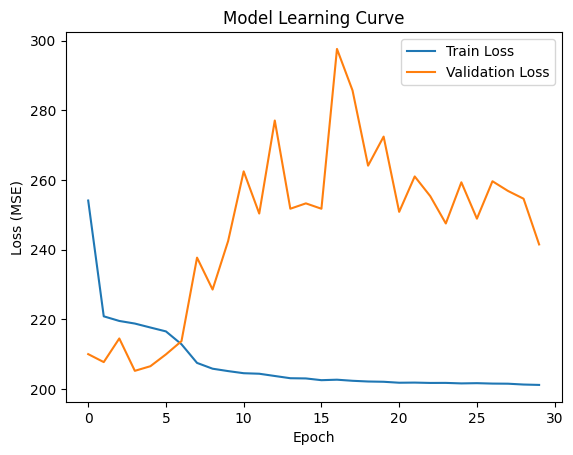

In [104]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


features = ['DAY_OF_WEEK','DISTANCE','DEP_DELAY','CRS_DEP_TIME_MIN','DEP_TIME_MIN','CRS_ARR_TIME_MIN','CRS_DEP_TIME_SIN','CRS_DEP_TIME_COS','DEP_TIME_SIN','DEP_TIME_COS', 'CRS_ARR_TIME_SIN','CRS_ARR_TIME_COS'] 
target = 'ARR_DELAY'


cluster_data = df[df['STATE_CLUSTER'] == 1].dropna(subset=features + [target])

X = cluster_data[features]
y = cluster_data[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = Sequential()


model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))


model.add(Dense(32, activation='relu'))


model.add(Dropout(0.2))

model.add(Dense(16, activation='relu'))

model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse')


print("Training Neural Network...")
history = model.fit(
         X_train_scaled, y_train,
        epochs=30,  
        batch_size=32, 
        validation_split=0.2, 
        verbose=1
)


predictions = model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae=mean_absolute_error(y_test,predictions)

print(f"\nNeural Network RMSE: {rmse:.2f} minutes")
print(f"\nNeural Network MAE: {mae:.2f} minutes")


import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Learning Curve')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend()
plt.show()